<img src = 'https://bancariosbh.org.br/manager/resources/uploads/213/350_198_8e66ca00d7dfdfbd00096a7c220be22c.jpg' height="200" width="340">
<p><b><font size = 5 face = 'verdana'> TAREFA AVALIATIVA 1 - MACHINE LEARNING</font></b></p>

<p><font size = 3 face = 'verdana'>Trabalho apresentado à conclusão do curso de MACHINE LEARNING do curso de Pós-Graduação em Inteligência Artificial, PUC Minas, como requisito parcial de avaliação. </font></b></p>
<p><font size = 3 face = 'verdana'><b>PROFESSOR:</b> CRISTIANO RODRIGUES DE CARVALHO<br> 
<b>ALUNO:</b> OSEMAR DA SILVA XAVIER<br>
<b>MATRÍCULA:</b> 1418586</font></p>
<p><font size = 3 face = 'verdana'>
<hr></hr>

<b>EXERCÍCIO PRÁTICO</b><br>
Adaptado de North, Matthew A. Data Mining for the Masses. 2012.<br><br>
Carregue a base de dados Automoveis.xlsx, e realize a preparação dos dados para que eles sejam consistentes. Você irá encontrar:<br>
1. Valores omissos que poderão ser registros ou atributos.<br>
2. Valores omissos que poderão ser estimados.<br>
3. Valores inconsistentes.<br>
4. Problemas de formatação de dados.<br>
</p></font>

<p><font size = 3 face = 'verdana'>Você poderá corrigir valores omissos e inconsistentes da forma que julgar procedente. Elimine campos caso ache que algum campo é redundante ou desinteressante. Explique sua estratégia. Quando é melhor substituir valores? Quando é melhor remover o registro? Quando podemos estimar o valor pelos demais? </font></b></p>

In [170]:
# Abaixo carrego as principais bibliotecas para analisar o dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [171]:
# Abaixo fiz o carregamento dos dados para a variável auto_df
auto_df = auto = pd.read_excel('automoveis.xlsx', sheet_name='Plan1')
auto_df.head()

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
0,alfa-romeo,gas,2.0,conversível,traseira,"168,80","64,10","48,80",dohc,4,"130,00",mpfi,"111,00","5000,00","13495,00"
1,alfa-romeo,gas,2.0,conversível,traseira,"168,80","64,10","48,80",dohc,4,"130,00",mpfi,"111,00","5000,00","16500,00"
2,alfa-romeo,gas,2.0,hatch,traseira,"171,20","65,50","52,40",ohcv,6,"152,00",mpfi,"154,00","5000,00","16500,00"
3,audi,gas,4.0,sedan,dianteira,"176,60","66,20","54,30",ohc,4,"109,00",mpfi,"102,00","5500,00","13950,00"
4,audi,gas,4.0,sedan,4x4,"176,60","66,40","54,30",ohc,5,"136,00",mpfi,"115,00","5500,00","17450,00"


In [172]:
# Utilizei o shape para verificar o total de linhas e colunas
auto_df.shape

(205, 15)

In [173]:
# utilizei o .info para trazer todas as informações do dataset
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fabricante           203 non-null    object 
 1   Combustível          200 non-null    object 
 2   Portas               203 non-null    float64
 3   Estilo Chassis       205 non-null    object 
 4   Tração               205 non-null    object 
 5   Comprimento          205 non-null    object 
 6   Largura              205 non-null    object 
 7   Altura               205 non-null    object 
 8   Tipo de motor        205 non-null    object 
 9   Número de cilindros  205 non-null    object 
 10  Tamanho do motor     205 non-null    object 
 11  Tipo de injeção      205 non-null    object 
 12  Potência (HP)        205 non-null    object 
 13  Pico RPM             205 non-null    object 
 14  Preço                205 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [174]:
# Quando faço df.isnull().sum(), obtenho a contagem de valores nulos em uma coluna.
auto_df.isnull().sum()

Fabricante             2
Combustível            5
Portas                 2
Estilo Chassis         0
Tração                 0
Comprimento            0
Largura                0
Altura                 0
Tipo de motor          0
Número de cilindros    0
Tamanho do motor       0
Tipo de injeção        0
Potência (HP)          0
Pico RPM               0
Preço                  0
dtype: int64

In [175]:
# Ao trazer as informações da coluna Fabricante sem repetição
# percebi que temos valores nulos (nan)
auto_df.Fabricante.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', nan],
      dtype=object)

In [176]:
# Eliminei as duas linhas nulas, pois não servirão para nossa análise
auto_df.dropna(subset=['Fabricante'], how='all', inplace=True)

In [177]:
# Conferindo os dados da coluna após a exclusão
auto_df.Fabricante.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [178]:
# Fiz um agrupamento dos dados da coluna Fabricante e contar
total_fabricante = auto_df.groupby(['Fabricante']).agg(n=('Fabricante', 'count')).reset_index()
total_fabricante['perc(%)'] = 100*total_fabricante['n']/total_fabricante['n'].sum()
total_fabricante

,Fabricante,n,perc(%)
0,alfa-romeo,3,1.477833
1,audi,7,3.448276
2,bmw,7,3.448276
3,chevrolet,3,1.477833
4,dodge,9,4.433498
5,honda,13,6.403941
6,isuzu,4,1.970443
7,jaguar,3,1.477833
8,mazda,16,7.881773
9,mercedes-benz,8,3.940887


### No caso do modelo de carro do fabricante Plymounth não temos modelos com outro tipo de combustível, para os três casos de **NaN** abaixo irei substituir por gas, conforme os outros casos. 

In [179]:
auto_df.groupby('Fabricante').get_group('plymouth')

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
116,plymouth,gas,2.0,hatch,dianteira,"157,30","63,80","50,80",ohc,4,"90,00",2bbl,"68,00","5500,00","5572,00"
117,plymouth,NaN,2.0,hatch,dianteira,"157,30","63,80","50,80",ohc,4,"98,00",spdi,"102,00","5500,00","7957,00"
118,plymouth,NaN,4.0,hatch,dianteira,"157,30","63,80","50,60",ohc,4,"90,00",2bbl,"68,00","5500,00","6229,00"
119,plymouth,NaN,4.0,sedan,dianteira,"167,30","63,80","50,80",ohc,4,"90,00",2bbl,"68,00","5500,00","6692,00"
120,plymouth,gas,4.0,sedan,dianteira,"167,30","63,80","50,80",ohc,4,"98,00",2bbl,"68,00","5500,00","7609,00"
121,plymouth,gas,4.0,suv,dianteira,"174,60","64,60","59,80",ohc,4,"122,00",2bbl,"88,00","5000,00","8921,00"
122,plymouth,gas,2.0,hatch,traseira,"173,20","66,30","50,20",ohc,4,"156,00",spdi,"145,00","5000,00","12764,00"


### Todos os valores foram substituídos por conforme abaixo. Falta tratar dos dois casos de vazio na coluna Portas. 

In [180]:
# Os casos em questão são do Fabricante Plymounth que por padrão são a gás
auto_df.fillna(value = 'gas',  
          inplace = True) 


In [181]:
# Após preencher os valores vazios com gás abaixo fiz um groupby por Fabricante
auto_df.groupby('Fabricante').get_group('plymouth')

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
116,plymouth,gas,2.0,hatch,dianteira,"157,30","63,80","50,80",ohc,4,"90,00",2bbl,"68,00","5500,00","5572,00"
117,plymouth,gas,2.0,hatch,dianteira,"157,30","63,80","50,80",ohc,4,"98,00",spdi,"102,00","5500,00","7957,00"
118,plymouth,gas,4.0,hatch,dianteira,"157,30","63,80","50,60",ohc,4,"90,00",2bbl,"68,00","5500,00","6229,00"
119,plymouth,gas,4.0,sedan,dianteira,"167,30","63,80","50,80",ohc,4,"90,00",2bbl,"68,00","5500,00","6692,00"
120,plymouth,gas,4.0,sedan,dianteira,"167,30","63,80","50,80",ohc,4,"98,00",2bbl,"68,00","5500,00","7609,00"
121,plymouth,gas,4.0,suv,dianteira,"174,60","64,60","59,80",ohc,4,"122,00",2bbl,"88,00","5000,00","8921,00"
122,plymouth,gas,2.0,hatch,traseira,"173,20","66,30","50,20",ohc,4,"156,00",spdi,"145,00","5000,00","12764,00"


In [182]:
# Existe valores como 'gas' que não deveria estar na coluna Portas
auto_df.Portas.unique()

array([2.0, 4.0, 'gas'], dtype=object)

### No campo 'Portas' existem dois valores que estão inseridos erroneamentes como 'gas' que deverão ser substituídos por seus equivalentes. 

In [183]:
auto_df.groupby('Portas').get_group('gas')

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
26,dodge,gas,gas,sedan,dianteira,"157,30","63,80","50,60",ohc,4,"98,00",mpfi,"102,00","5500,00","8558,00"
61,mazda,diesel,gas,sedan,dianteira,"177,80","66,50","55,50",ohc,4,"122,00",idi,"64,00","4650,00","10795,00"


## Seguindo as especificações farei os seguintes ajustes: dodge -> 4.0 e mazda -> 2.0

In [184]:
auto_df.groupby('Fabricante').get_group('mazda')

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
49,mazda,gas,2.0,hatch,dianteira,"159,10","64,20","54,10",ohc,4,"91,00",2bbl,"68,00","5000,00","5195,00"
50,mazda,gas,2.0,hatch,dianteira,"159,10","64,20","54,10",ohc,4,"91,00",2bbl,"68,00","5000,00","6095,00"
51,mazda,gas,2.0,hatch,dianteira,"159,10","64,20","54,10",ohc,4,"91,00",2bbl,"68,00","5000,00","6795,00"
52,mazda,gas,4.0,sedan,dianteira,"166,80","64,20","54,10",ohc,4,"91,00",2bbl,"68,00","5000,00","6695,00"
53,mazda,gas,4.0,sedan,dianteira,"166,80","64,20","54,10",ohc,4,"91,00",2bbl,"68,00","5000,00","7395,00"
54,mazda,gas,2.0,hatch,traseira,"169,00","65,70","49,60",rotor,2,"70,00",4bbl,"101,00","6000,00","11845,00"
55,mazda,gas,2.0,hatch,traseira,"169,00","65,70","49,60",rotor,2,"70,00",4bbl,"101,00","6000,00","13645,00"
56,mazda,gas,2.0,hatch,traseira,"169,00","65,70","49,60",rotor,2,"80,00",mpfi,"135,00","6000,00","15645,00"
57,mazda,gas,2.0,hatch,dianteira,"177,80","66,50","53,70",ohc,4,"122,00",2bbl,"84,00","4800,00","8845,00"
58,mazda,gas,4.0,sedan,dianteira,"177,80","66,50","55,50",ohc,4,"122,00",2bbl,"84,00","4800,00","8495,00"


In [185]:
# Fiz as substituições na coluna portas que de acordo com cada modelo
def TelValid_1(df):
    if df['Fabricante'] == 'mazda' and df['Portas'] == 'gas':
        return '4.0'
    else:
      if df['Fabricante'] == 'dodge' and df['Portas'] == 'gas':
        return '2.0'
    
auto_df['Portas'] = auto_df.apply(TelValid_1, axis = 1)

In [186]:
auto_df.Portas.unique()

array([None, '2.0', '4.0'], dtype=object)

In [190]:
# Para poder agrupar por Fabricante e valores será necessário modificar ',' por '.'
auto_df['Preço'] = [x.replace(',', '.') for x in auto_df['Preço']]
auto_df['Preço'] = auto_df['Preço'].astype(float)

In [192]:
# Abaixo fiz a conversão da coluna preço para float
auto_df['Preço'] = auto_df['Preço'].map(lambda x: float(x))


In [194]:
# Após a conversão será possível calcular a média de preços para cada modelo
auto.groupby('Fabricante')['Preço'].mean()

Fabricante
alfa-romeo       15498.333333
audi             17194.590000
bmw              26835.000000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu            11061.815000
jaguar           34600.000000
mazda            10634.625000
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          27761.826000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: Preço, dtype: float64

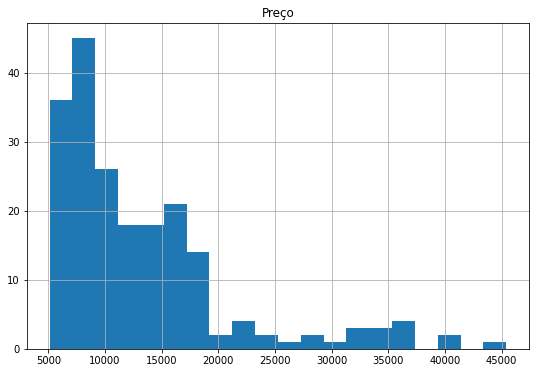

In [195]:
auto_df.hist(column='Preço',  
                   figsize=(9,6),     
                   bins=20);          